<a href="https://colab.research.google.com/github/Jinyoung9393/AIFFEL_ONLINE_QUEST/blob/master/2023.08.09/Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [2]:
# keras.datasets 안에 boston_housing 데이터셋을 로드합니다.
from keras.datasets import boston_housing

(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

# 데이터셋의 크기를 확인합니다.
print(len(train_data))
print(len(test_data))
print(len(train_labels))
print(len(test_labels))

57026/57026 [==============================] - 0s 0us/step
404
102
404
102


In [3]:
# 문제 1-1: 데이터셋의 전처리를 위해 표준화 작업을 수행합니다.
# 먼저 입력 데이터의 각 특성의 평균을 뺍니다.
mean=train_data.mean(axis=0)
train_data=train_data-mean
# 평균을 뺀 입력 데이터에서 표준편차를 나눕니다.
# 데이터 특성의 중앙이 0에 가깝게 만들고, 표준편차가 1이 되게 만듭니다.
std=train_data.std(axis=0)
train_data=test_data/std

# 테스트 데이터셋도 마찬가지로 평균을 빼고, 표준편차로 나눕니다.
test_data=test_data-mean
test_data=test_data/std

In [4]:
# 문제 1-2: 주택 가격 예측을 위한 딥러닝 모델 구성 및 컴파일합니다.
# input_shape은 (train_data.shape[1], )으로 구성합니다.
# 회귀(예측)을 위한 모델이므로 loss를 mse, metrics를 mae로 사용합니다.
import tensorflow
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.optimizers import Adam

# Create a Sequential model
model = models.Sequential()
model.add(layers.Dense(128, input_shape=(train_data.shape[1], ), activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='linear'))

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1792      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 10,113
Trainable params: 10,113
Non-trainable params: 0
_________________________________________________________________


In [6]:
history = model.fit(train_data, train_labels, epochs=100, batch_size=16, validation_split=0.2)

Epoch 1/100
6/6 [==============================] - 2s 121ms/step - loss: 463.5704 - mae: 19.7013 - val_loss: 859.1519 - val_mae: 26.8520
Epoch 2/100
6/6 [==============================] - 0s 34ms/step - loss: 339.5312 - mae: 16.3700 - val_loss: 680.8355 - val_mae: 23.2997
Epoch 3/100
6/6 [==============================] - 0s 17ms/step - loss: 237.9054 - mae: 12.8656 - val_loss: 523.6734 - val_mae: 19.5828
Epoch 4/100
6/6 [==============================] - 0s 15ms/step - loss: 155.3647 - mae: 9.4194 - val_loss: 385.5460 - val_mae: 15.9041
Epoch 5/100
6/6 [==============================] - 0s 14ms/step - loss: 100.8128 - mae: 6.7944 - val_loss: 280.7922 - val_mae: 13.0966
Epoch 6/100
6/6 [==============================] - 0s 11ms/step - loss: 77.3329 - mae: 6.1788 - val_loss: 224.4843 - val_mae: 11.5140
Epoch 7/100
6/6 [==============================] - 0s 13ms/step - loss: 73.3750 - mae: 6.4422 - val_loss: 212.9034 - val_mae: 11.2187
Epoch 8/100
6/6 [==============================] - 0s

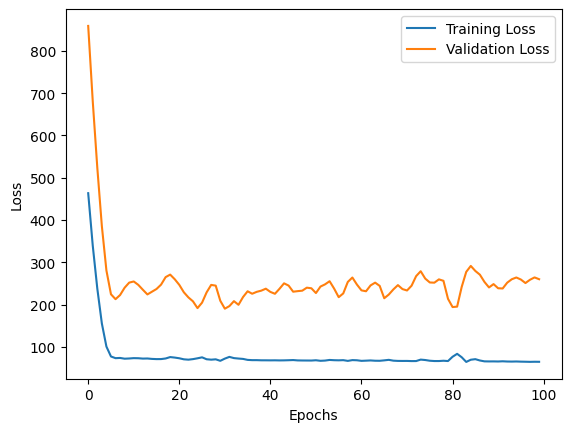

In [9]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
import numpy as np
test_loss = model.evaluate(test_data, test_labels)
print('test_loss:', test_loss)

test_mae = np.mean(np.abs(model.predict(test_data) - test_labels))
print('test_mae:', test_mae)

4/4 [==============================] - 0s 4ms/step - loss: 563.4589 - mae: 21.8782
test_loss: [563.4589233398438, 21.87822151184082]
4/4 [==============================] - 0s 3ms/step
test_mae: 21.878298818198868
